In [87]:
import pandas as pd
import numpy as np

In [88]:
file_path = r'C:\Users\Tingyu\Desktop\Python作业\dataverse_files\UNVotes-Clean.csv'
votes = pd.read_csv(file_path)

# drop no member country
votes = votes[votes['vote'] != 9]

votes['CountrynameCOW'] = votes['CountrynameCOW'].replace('United States of America', 'United States')
votes['CountrynameCOW'] = votes['CountrynameCOW'].replace("South Korea", "Korea, South")
votes['CountrynameCOW'] = votes['CountrynameCOW'].replace("North Korea", "Korea, North")
votes['CountrynameCOW'] = votes['CountrynameCOW'].replace("German Democratic Republic", 'Germany')
votes['CountrynameCOW'] = votes['CountrynameCOW'].replace("Myanmar", 'Burma')
votes['CountrynameCOW'] = votes['CountrynameCOW'].replace("Yemen People's Republic", 'Yemen')


In [89]:
print(votes.columns.values)

['date' 'year' 'rcid' 'resid' 'session' 'ccode' 'Country' 'Countryname'
 'CountrynameCOW' 'vote' 'unres' 'yes' 'no' 'abstain' 'amend' 'para'
 'importantvote' 'me' 'nu' 'di' 'hr' 'co' 'ec']


In [90]:
# Calculate vote 'yes' ratio by country and use a DataFrame to restore the result

yes_vote_ratio = votes[votes['vote'] == 1].groupby('CountrynameCOW').size() / votes.groupby('CountrynameCOW').size()
result_df = pd.DataFrame({'CountrynameCOW': yes_vote_ratio.index, 'Yes_vote_ratio': yes_vote_ratio})

print(result_df)

               CountrynameCOW  Yes_vote_ratio
CountrynameCOW                               
Afghanistan       Afghanistan        0.790281
Albania               Albania        0.569028
Algeria               Algeria        0.875411
Andorra               Andorra        0.642195
Angola                 Angola        0.758583
...                       ...             ...
Venezuela           Venezuela        0.879839
Vietnam               Vietnam        0.859770
Yemen                   Yemen        0.863029
Zambia                 Zambia        0.863039
Zimbabwe             Zimbabwe        0.813133

[193 rows x 2 columns]


In [91]:
import plotly.graph_objects as go
from plotly.offline import iplot


In [92]:
code_df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

def return_country_code(country):
    if country in code_df['COUNTRY'].values:
        return code_df[code_df['COUNTRY'] == country]['CODE'].values[0]

result_df['CountryCode'] = result_df['CountrynameCOW'].apply(return_country_code)
result_df = result_df.dropna(subset=['CountryCode'])

print(result_df)

is_usa_present = 'USA' in result_df['CountryCode'].values
print(is_usa_present)

               CountrynameCOW  Yes_vote_ratio CountryCode
CountrynameCOW                                           
Afghanistan       Afghanistan        0.790281         AFG
Albania               Albania        0.569028         ALB
Algeria               Algeria        0.875411         DZA
Andorra               Andorra        0.642195         AND
Angola                 Angola        0.758583         AGO
...                       ...             ...         ...
Venezuela           Venezuela        0.879839         VEN
Vietnam               Vietnam        0.859770         VNM
Yemen                   Yemen        0.863029         YEM
Zambia                 Zambia        0.863039         ZMB
Zimbabwe             Zimbabwe        0.813133         ZWE

[179 rows x 3 columns]
True


In [93]:
# Create data for figure
data = [
    go.Choropleth(
        locations=result_df['CountryCode'],  # Country code column
        z=result_df['Yes_vote_ratio'],  # "Yes" vote ratio column
        text=result_df['CountryCode'],  # Country code column (you can modify it to the country name column if desired)
        colorscale='YlOrRd',  # Color scale
        marker_line_color='darkgray',  # Border color
        marker_line_width=0.5,  # Border width
        colorbar_title='Yes Vote Ratio',  # Color bar title
    )
]

# Set layout
layout = go.Layout(
    title='Yes Vote Ratio by Country',  # Title
    geo=dict(
        showframe=False,  # Whether to show map frame
        showcoastlines=True,  # Whether to show coastlines
        projection_type='equirectangular'  # Map projection type
    )
)

# Create figure object
fig = go.Figure(data=data, layout=layout)

# Display the chart in Jupyter Notebook
iplot(fig)

In [94]:
# Calculate vote 'yes' ratio by country and by year
yes_vote_ratio_byyear = votes[votes['vote'] == 1].groupby(['year', 'Country']).size() / votes.groupby(['year', 'Country']).size()
result_df2 = pd.DataFrame({'Year': yes_vote_ratio_byyear.index.get_level_values(0), 'Country': yes_vote_ratio_byyear.index.get_level_values(1), 'Yes_vote_ratio': yes_vote_ratio_byyear.values})

print(result_df2)

      Year Country  Yes_vote_ratio
0     1991     AAB        0.608108
1     1991     AFG        0.864865
2     1991     ALB        0.540541
3     1991     ALG        0.945946
4     1991     ANG        0.716216
...    ...     ...             ...
5836  2021     VEN        0.822785
5837  2021     WSM        0.670886
5838  2021     YEM        0.949367
5839  2021     ZAM        0.772152
5840  2021     ZIM        0.797468

[5841 rows x 3 columns]


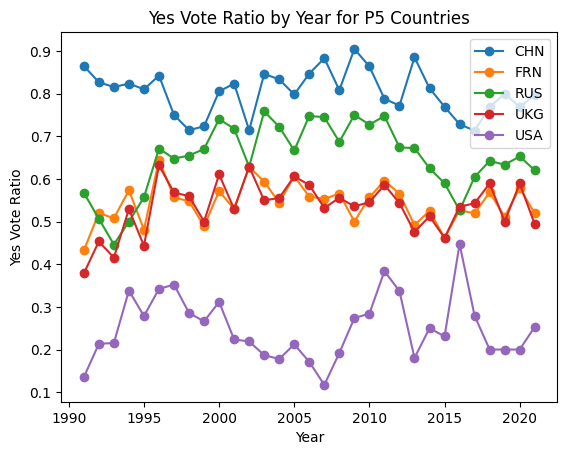

In [95]:
# Filter data for the five permanent members
p5_countries = ['CHN', 'FRN', 'RUS', 'UKG', 'USA']
p5_data = result_df2[result_df2['Country'].isin(p5_countries)]

# Create the figure and axis
fig, ax = plt.subplots()

# Plot a line graph for each permanent member
for country in p5_countries:
    country_data = p5_data[p5_data['Country'] == country]
    ax.plot(country_data['Year'], country_data['Yes_vote_ratio'], marker='o', label=country)

# Add legend, labels, and title
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Yes Vote Ratio')
ax.set_title('Yes Vote Ratio by Year for P5 Countries')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Display the line graph
plt.show()

In [96]:
# Calculate vote 'yes' ratio by country on specific issue

me_ratio = (votes[votes['vote'] == 1].groupby('me').size() / votes[votes['me'] == 1].groupby('me').size()).fillna(0)
nu_ratio = (votes[votes['vote'] == 1].groupby('nu').size() / votes[votes['nu'] == 1].groupby('nu').size()).fillna(0)
di_ratio = (votes[votes['vote'] == 1].groupby('di').size() / votes[votes['di'] == 1].groupby('di').size()).fillna(0)
hr_ratio = (votes[votes['vote'] == 1].groupby('hr').size() / votes[votes['hr'] == 1].groupby('hr').size()).fillna(0)
co_ratio = (votes[votes['vote'] == 1].groupby('co').size() / votes[votes['co'] == 1].groupby('co').size()).fillna(0)
ec_ratio = (votes[votes['vote'] == 1].groupby('ec').size() / votes[votes['ec'] == 1].groupby('ec').size()).fillna(0)

result_df3 = pd.DataFrame({
    'Palestinian conflict': me_ratio,
    'Nuclear weapons': nu_ratio,
    'Disarmament': di_ratio,
    'Human Right': hr_ratio,
    'Colonialism': co_ratio,
    'Economic Development': ec_ratio
})

result_df3 = result_df3.loc[(result_df3 != 0).any(axis=1)]
print(result_df3)



   Palestinian conflict  Nuclear weapons  Disarmament  Human Right  \
1              0.739988         0.750412     0.767676     0.651826   

   Colonialism  Economic Development  
1     0.765607              0.770473  


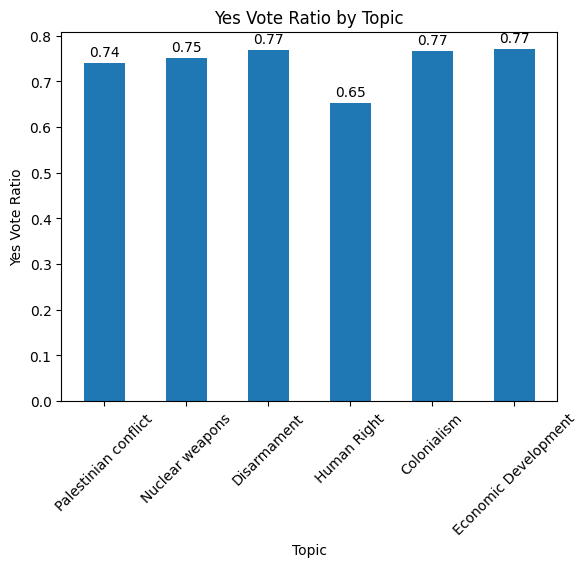

In [97]:
import matplotlib.pyplot as plt

# turn result_df3 to bar chart
bar_width = 0.5

topics = result_df3.columns
ratios = result_df3.values[0]

fig, ax = plt.subplots()
bars = ax.bar(topics, ratios, width=bar_width)

ax.set_xlabel('Topic')
ax.set_ylabel('Yes Vote Ratio')
ax.set_title('Yes Vote Ratio by Topic')

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom')

plt.xticks(rotation=45)

plt.show()
